# Lista 7
## Magdalena Ryś

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Zadanie 1

Dana jest zagadnienie początkowe:

$$ y' + 4y = x^2, \quad y(0) = 1. $$

Oblicz wartość \( y(0.03) \) w jednym, dwóch i czterech krokach czasowych za pomocą:

1. **Metody Eulera**,
2. **Metody Rungego-Kutty drugiego rzędu**,
3. **Metody Rungego-Kutty czwartego rzędu**.

Porównaj wyniki z rozwiązaniem analitycznym:

$$ y = \frac{31}{32} e^{-4x} + \frac{1}{4}x^2 - \frac{1}{8}x + \frac{1}{32}. $$


In [2]:
def euler(f, h, x0, y0, xn):
    x, y = x0, y0
    while x < xn:
        y += h * f(x, y)
        x += h
    return y

def rk2(f, h, x0, y0, xn):
    x, y = x0, y0
    while x < xn:
        k1 = f(x, y)
        k2 = f(x + h, y + h * k1)
        y += h * (k1 + k2) / 2
        x += h
    return y

def rk4(f, h, x0, y0, xn):
    x, y = x0, y0
    while x < xn:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        k3 = f(x + h/2, y + h/2 * k2)
        k4 = f(x + h, y + h * k3)
        y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
    return y

   Krok czasowy  Metoda Eulera  Błąd Eulera  Metoda RK2  Błąd RK2  Metoda RK4  \
0             1       0.880000     0.006929    0.887213  0.000284    0.886929   
1             2       0.883603     0.003326    0.886997  0.000068    0.886929   
2             4       0.885299     0.001631    0.886946  0.000017    0.886929   

       Błąd RK4  
0  2.050303e-07  
1  1.219813e-08  
2  7.438453e-10  


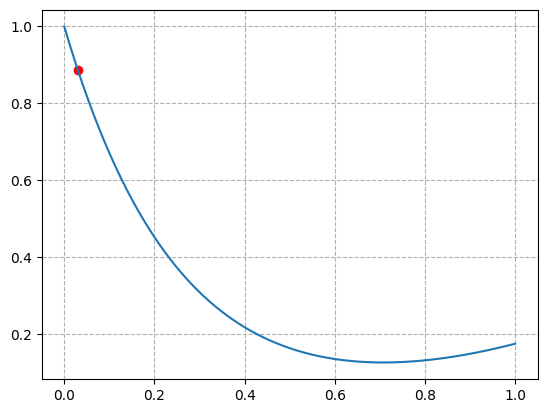

In [3]:
def func(x, y):
    return -4 * y + x**2

def analytical_solution(x):
    return (31 / 32) * np.exp(-4 * x) + (1 / 4) * x**2 - (1 / 8) * x + (1 / 32)

x0, y0 = 0, 1
xn = 0.03
steps = [1, 2, 4]

result = analytical_solution(xn)
data = []

for step in steps:
    h = (xn - x0) / step
    euler_result = euler(func, h, x0, y0, xn)
    rk2_result = rk2(func, h, x0, y0, xn)
    rk4_result = rk4(func, h, x0, y0, xn)

    data.append({
        "Krok czasowy": step,
        "Metoda Eulera": euler_result,
        "Błąd Eulera": np.abs(euler_result - result),
        "Metoda RK2": rk2_result,
        "Błąd RK2": np.abs(rk2_result - result),
        "Metoda RK4": rk4_result,
        "Błąd RK4": np.abs(rk4_result - result),
    })

df = pd.DataFrame(data)
print(df)

xlin = np.linspace(0, 1, 1000)
plt.plot(xlin, analytical_solution(xlin))
plt.scatter(xn, rk4_result, color='r')
plt.grid(True, linestyle="--")
plt.show()

### Zadanie 2

Rozwiąż zagadnienie początkowe:

$$ y' = \sin y, \quad y(0) = 1 $$

dla $ x $ od $ 0 $ do $ 0.5 $ za pomocą:

1. Metody Eulera,
2. Metody Rungego-Kutty czwartego rzędu,

przy kroku czasowym $ h = 0.1 $.

Porównaj wyniki na wykresie.


In [4]:
def euler_zad2(f, h, x0, y0, xn):
    x_values = [x0]
    y_values = [y0]
    x, y = x0, y0
    while x < xn:
        y += h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)
    return np.array(x_values), np.array(y_values)

def rk4_zad2(f, h, x0, y0, xn):
    x_values = [x0]
    y_values = [y0]
    x, y = x0, y0
    while x < xn:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h * k1 / 2)
        k3 = f(x + h/2, y + h * k2 / 2)
        k4 = f(x + h, y + h * k3)
        y += (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x += h
        x_values.append(x)
        y_values.append(y)
    return np.array(x_values), np.array(y_values)

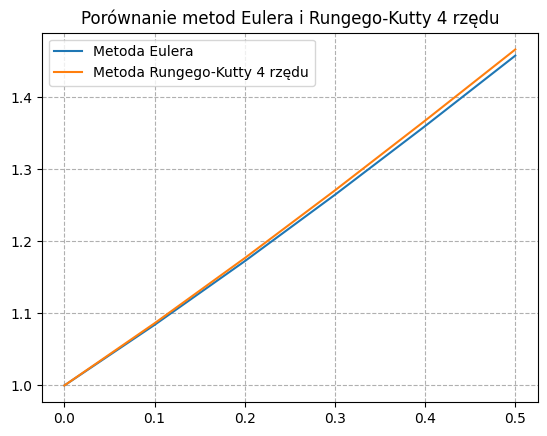

In [5]:
def f(x, y):
    return np.sin(y)

x0, y0 = 0, 1
xn = 0.5
h = 0.1

x_euler, y_euler = euler_zad2(f, h, x0, y0, xn)
x_rk4, y_rk4 = rk4_zad2(f, h, x0, y0, xn)

plt.plot(x_euler, y_euler, label="Metoda Eulera")
plt.plot(x_rk4, y_rk4, label="Metoda Rungego-Kutty 4 rzędu")
plt.title('Porównanie metod Eulera i Rungego-Kutty 4 rzędu')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()


### Zadanie 3
Równanie ruchu wahadła matematycznego z tłumieniem oraz okresową siłą wymuszającą można przedstawić w postaci:

$$ 
\frac{d^2\theta}{d\tau^2} + \frac{1}{Q} \frac{d\theta}{d\tau} + \sin\theta = \hat{A} \cos(\hat{\omega}\tau), 
\tag{1}
$$

gdzie:

$$ 
Q = \frac{mg}{\omega_0\nu}, \quad \omega_0 = \sqrt{\frac{g}{l}}, \quad \hat{\omega} = \frac{\omega}{\omega_0}, \quad \tau = \omega_0 t, \quad \hat{A} = \frac{A}{mg}.
$$

Rozwiąż równanie (1) metodą Rungego-Kutty czwartego rzędu dla następujących warunków początkowych:

1. $ Q = 2 $, $ \hat{\omega} = \frac{2}{3} $, $ \hat{A} = 0.5 $, $ \hat{v}_0 = 0 $, $ \theta_0 = 0.01 $,
2. $ Q = 2 $, $ \hat{\omega} = \frac{2}{3} $, $ \hat{A} = 0.5 $, $ \hat{v}_0 = 0 $, $ \theta_0 = 0.3 $,
3. $ Q = 2 $, $ \hat{\omega} = \frac{2}{3} $, $ \hat{A} = 1.35 $, $ \hat{v}_0 = 0 $, $ \theta_0 = 0.3 $.

Przedstaw wyniki (zależność $ \theta = \theta(\tau) $) na wykresach.


In [6]:
def rk4_zad3(f, t0, y0, tn, h, *args):
    t_points = np.arange(t0, tn + h, h)
    y_points = np.zeros((len(t_points), len(y0)))
    y_points[0] = y0

    for i in range(1, len(t_points)):
        t = t_points[i-1]
        y = y_points[i-1]

        k1 = np.array(f(t, y, *args)) * h
        k2 = np.array(f(t + 0.5*h, y + 0.5*k1, *args)) * h
        k3 = np.array(f(t + 0.5*h, y + 0.5*k2, *args)) * h
        k4 = np.array(f(t + h, y + k3, *args)) * h

        y_points[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_points, y_points

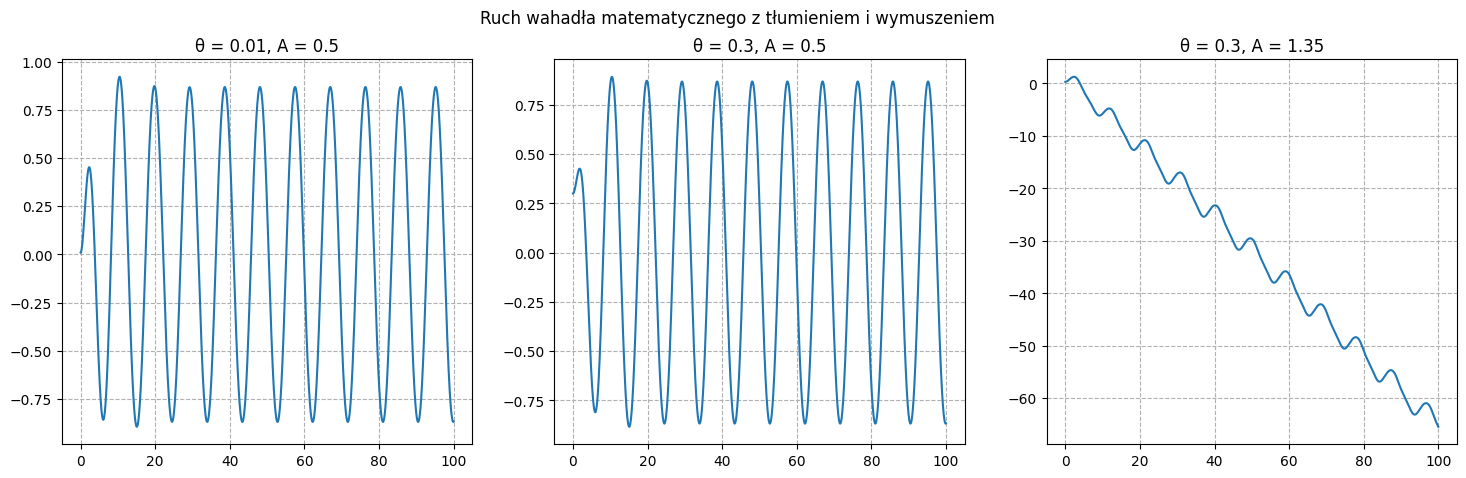

In [7]:
Q = 2
omega = 2/3 
tn = 100  
dt = 0.01 

def equations(tau, y, Q, omega, A):
    theta1, theta2 = y  
    dtheta1 = theta2
    dtheta2 = -np.sin(theta1) - (1/Q) * theta2 + A * np.cos(omega * tau)
    return np.array([dtheta1, dtheta2])

initial_conditions = [
    {"theta": 0.01, "A": 0.5},
    {"theta": 0.3, "A": 0.5},
    {"theta": 0.3, "A": 1.35}
]

plt.figure(figsize=(18, 5))

for i, condition in enumerate(initial_conditions):
    y0 = [condition["theta"], 0] 
    t_span = (0, tn)
    t_points, y_points = rk4_zad3(equations, 0, y0, tn, dt, Q, omega, condition["A"])
    plt.subplot(1, 3, i+1)
    plt.plot(t_points, y_points[:, 0])
    plt.title(f'θ = {condition["theta"]}, A = {condition["A"]}')
    plt.grid(True, linestyle="--")

plt.suptitle('Ruch wahadła matematycznego z tłumieniem i wymuszeniem')
plt.show()

### Zadanie 4

Znajdź trajektorię piłki rzuconej ukośnie do powierzchni Ziemi:

1. (a) Zaniedbując opory powietrza,  
2. (b) Uwzględniając opory powietrza.

W drugim przypadku załóż, że siła oporu powietrza ma postać:

$$
\mathbf{F_o} = -\frac{1}{2} c_w \rho A |\mathbf{V}| \mathbf{V},
$$

gdzie:  
- $ c_w \approx 0.35 $ — współczynnik oporu powietrza,  
- $ \rho \approx 1.2 \, \mathrm{\frac{kg}{m^3}} $ — gęstość powietrza,  
- $ A \, [\mathrm{m^2}] $ — pole przekroju poprzecznego piłki,  
- $ \mathbf{V} $ — wektor prędkości piłki,  
- $ |\mathbf{V}| $ — wartość prędkości.

Przeprowadź obliczenia dla różnych:  
- wielkości piłki,  
- prędkości początkowych,  
- kątów rzutu.  

Wyniki przedstaw w postaci trajektorii na wykresie.

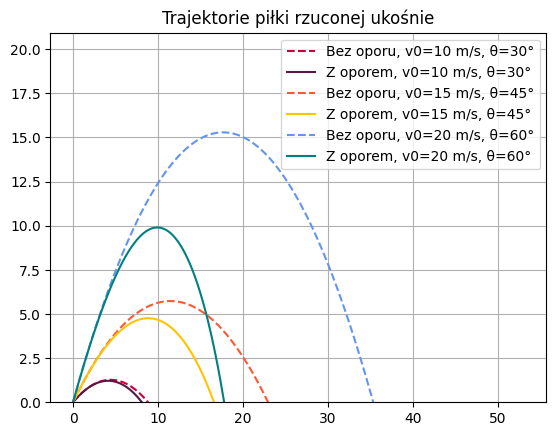

In [8]:
g = 9.81  
c_w = 0.35 
rho = 1.2  
m = 0.45

def area(r):
    return np.pi * (r / 2)**2

def brak_oporu(t, y):
    x, vx, y, vy = y
    ax = 0
    ay = -g
    return [vx, ax, vy, ay]

def z_oporem(t, y, A):
    x, vx, y, vy = y
    v = np.sqrt(vx**2 + vy**2)  
    ax = - (1 / 2) * c_w * rho * A * v * vx / m
    ay = -g - (1 / 2) * c_w * rho * A * v * vy / m
    return [vx, ax, vy, ay]

conditions = [
    {"v_0": 10, "theta": 30, "r": 0.2, "c1": "#C70039", "c2": "#581845"},
    {"v_0": 15, "theta": 45, "r": 0.25, "c1": "#FF5733", "c2": "#FFC300"},
    {"v_0": 20, "theta": 60, "r": 0.3, "c1": "#6495ED", "c2": "#008080"}
]

t0, tn = 0, 5
dt = 0.01

for condition in conditions:
    v_0 = condition["v_0"]
    theta = np.radians(condition["theta"])
    r = condition["r"]
    c1 = condition["c1"]
    c2 = condition["c2"]
    A = area(r)
    v_x0 = v_0 * np.cos(theta)
    v_y0 = v_0 * np.sin(theta)
    y0 = [0, v_x0, 0, v_y0] 

    _, y_bez_oporu = rk4_zad3(brak_oporu, t0, y0, tn, dt)
    _, y_z_oporem = rk4_zad3(z_oporem, t0, y0, tn, dt, A)

    plt.plot(y_bez_oporu[:, 0], y_bez_oporu[:, 2], label=f'Bez oporu, v0={v_0} m/s, θ={condition["theta"]}°', color=c1, linestyle='--')
    plt.plot(y_z_oporem[:, 0], y_z_oporem[:, 2], label=f'Z oporem, v0={v_0} m/s, θ={condition["theta"]}°', color=c2)

plt.title('Trajektorie piłki rzuconej ukośnie')
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()

### Zadanie 5
Rozwiąż następujące zagadnienie brzegowe:

$$
y'' + (1 - 0.2x)y^2 = 0, \quad y(0) = 0, \quad y\left(\frac{\pi}{2}\right) = 1.
$$


In [9]:
def zad5(x, vars):
    y, z = vars  
    dydx = z
    dzdx = -(1 - 0.2 * x) * y**2
    return np.array([dydx, dzdx])

def rk4_drugiego_rzedu(f, h, x0, y0, z0, xn):
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    x, y, z = x0, y0, z0

    while x < xn:
        k1 = f(x, [y, z])
        k2 = f(x + h / 2, [y + h * k1[0] / 2, z + h * k1[1] / 2])
        k3 = f(x + h / 2, [y + h * k2[0] / 2, z + h * k2[1] / 2])
        k4 = f(x + h, [y + h * k3[0], z + h * k3[1]])

        y += (h / 6) * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        z += (h / 6) * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
        x += h

        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
    return np.array(x_values), np.array(y_values), np.array(z_values)

def shooting_method(h, x0, y0, xn, y, eps=1e-6):
    z0_1 = 1.0
    z0_2 = 2.0

    def boundary_value(z0):
        _, y_values, _ = rk4_drugiego_rzedu(zad5, h, x0, y0, z0, xn)
        return y_values[-1] - y

    f1 = boundary_value(z0_1)
    f2 = boundary_value(z0_2)

    while abs(f2) > eps:
        z0_new = z0_2 - f2 * (z0_2 - z0_1) / (f2 - f1)
        z0_1, z0_2 = z0_2, z0_new
        f1, f2 = f2, boundary_value(z0_2)
    return z0_2

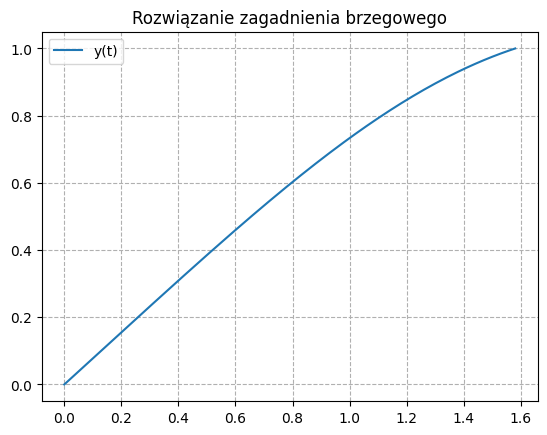

In [10]:
x0 = 0
y0 = 0
xn = np.pi / 2
y = 1
h = 0.01  

z0 = shooting_method(h, x0, y0, xn, y)
t_values, y_values, z_values = rk4_drugiego_rzedu(zad5, h, x0, y0, z0, xn)

plt.plot(t_values, y_values, label="y(t)")
plt.title("Rozwiązanie zagadnienia brzegowego")
plt.legend()
plt.grid(linestyle="--")
plt.show()